In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


%matplotlib inline

Using TensorFlow backend.


In [2]:
import os
import glob
import cv2

In [3]:
#load pictures without FPT
images = [cv2.imread(file) for file in glob.glob("/Users/xiaomeng/Documents/Deeplearning/FPT/FPT_img/10_1/FPT_no/*.JPG")]
len(images)
crop_images=[]
for image in images:
    crop_image = image[88:638, 167:717] #crop to 550x550
    crop_image = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)
    crop_images.append(crop_image)
#images[2].shape
train_x_noFPT = np.array(crop_images)
train_x_noFPT = np.reshape(train_x_noFPT, (-1,550,550,1))
train_y_noFPT = np.zeros(len(train_x_noFPT))
num_noFPT = len(train_x_noFPT)

In [4]:
train_y_noFPT
print(num_noFPT)

943


In [5]:
#load pictures with FPT
images = [cv2.imread(file) for file in glob.glob("/Users/xiaomeng/Documents/Deeplearning/FPT/FPT_img/10_1/FPT_yes/*.JPG")]
len(images)
crop_images=[]
for image in images:
    crop_image = image[88:638, 167:717] #crop to 550x550
    crop_image = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)
    crop_images.append(crop_image)
#images[2].shape
train_x_FPT = np.array(crop_images)
train_x_FPT = np.reshape(train_x_FPT, (-1,550,550,1)).astype("float32")
train_y_FPT = np.ones(len(train_x_FPT))
num_FPT = len(train_x_FPT)
print(num_FPT)

914


In [6]:
shuffled = np.random.choice(num_noFPT+num_FPT, replace=False, size=num_FPT+num_noFPT)
train_x_all = np.concatenate((train_x_FPT, train_x_noFPT))
train_y_all = np.concatenate((train_y_FPT, train_y_noFPT))

In [7]:
print(train_x_all.shape)
input_shape = (550, 550, 1)

(1857, 550, 550, 1)


In [8]:
test_x = train_x_all[0:1857:10]
test_y = train_y_all[0:1857:10]
test_x.shape

(186, 550, 550, 1)

(550, 550)

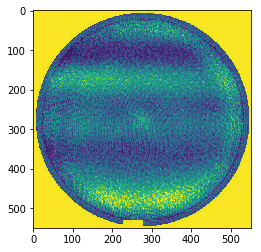

In [9]:
imshow(crop_images[20])
crop_images[0].shape

In [ ]:
#data augmentation
image_gen = ImageDataGenerator(rotation_range=180)
image_gen.fit(train_x_all, augment=True)


In [14]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(32, 32), strides=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (16, 16), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 16
epochs = 100

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 260, 260, 16)      16400     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 130, 130, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 115, 115, 32)      131104    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 57, 57, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 103968)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 103969    
Total params: 251,473
Trainable params: 251,473
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit_generator(image_gen.flow(train_x_all, train_y_all,
          batch_size=batch_size),
          epochs=epochs,
          verbose=1,
          validation_data=(test_x, test_y))

Train on 1857 samples, validate on 186 samples
Epoch 1/100
1296/1857 [===================>..........] - ETA: 1:24:03 - loss: 7.9712 - acc: 0.5000

KeyboardInterrupt: 

In [18]:
model = Sequential()
    model.add(Cropping2D(cropping=((2, 2), (4, 4)),
                         input_shape=(28, 28, 3)))

IndentationError: unexpected indent (<ipython-input-18-91edb90d0644>, line 2)